Czas po którym kula uzyska prędkość zerową 1.49s
Całkowity czas lotu kuli to: 14.631s
Wysokość maksymalna jaką osiągnie kula to 123.232m
Prędkość podczas zderzenia się kuli z ziemią wynosi -9.904m/s


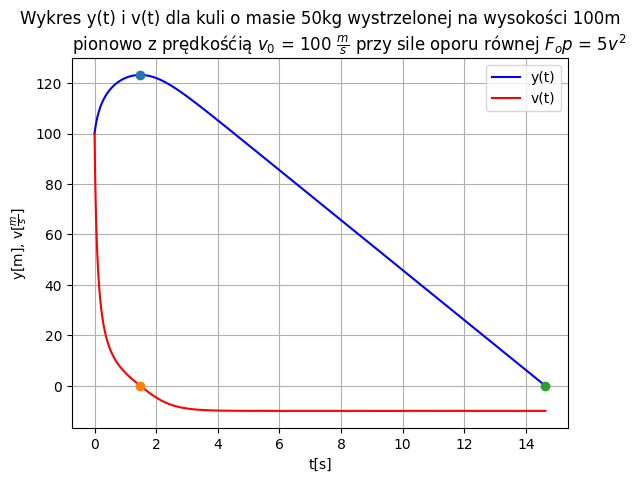

In [99]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

m = 50 
y0 = 100
v0 = 100
g = 9.81

def f(t, r):
    y, v = r
    dy_dt = v
    dv_dt = -g - (5 * v**2) / m
    return dy_dt, dv_dt

def f2(t, r):
    y, v = r
    dy_dt = v
    dv_dt = -g + (5 * v**2) / m
    return dy_dt, dv_dt

t_f = 0
h_max = 0

for i in range(500):
    t_f = 1.25 + i * 0.001
    t = np.linspace(0, t_f, 101)
    if i > 0:
        h_max = y[-1]
    sol = solve_ivp(f, (0, t_f), (y0, v0), t_eval=t) 
    y, v = sol.y
    if h_max > y[-1]:
        t_f = t_f - 0.001
        t_f = round(t_f,3)
        t = np.linspace(0, t_f, 101)
        sol = solve_ivp(f, (0, t_f), (y0, v0), t_eval=t) 
        y, v = sol.y
        break

t_f2 = 15
y_k = 0.0

for i in range(20):
    t_f2 = 14.62 + i * 0.001
    t2 = np.linspace(t_f, t_f2, 101)
    sol2 = solve_ivp(f2, (t_f, t_f2), (y[-1], 0), t_eval=t2) 
    y2, v2 = sol2.y   
    if y2[-1] < y_k:
        t_f2 -= 0.001
        t_f2 = round(t_f2,3)
        break

print(f'Czas po którym kula uzyska prędkość zerową {t_f}s')
print(f'Całkowity czas lotu kuli to: {t_f2}s')
print(f'Wysokość maksymalna jaką osiągnie kula to {round(y[-1], 3)}m')
print(f'Prędkość podczas zderzenia się kuli z ziemią wynosi {round(v2[-1], 3)}m/s')


plt.plot(t,y,"blue")
plt.plot(t, v,"red")
plt.plot(t2,y2,"blue")
plt.plot(t2,v2,'red')
plt.plot(t_f,y[-1],"o")
plt.plot(t_f,v[-1],"o")
plt.plot(t_f2,y2[-1],"o")
plt.grid()
plt.xlabel("t[s]")
plt.ylabel("y[m], v[$\\frac{m}{s}$]")
plt.title('Wykres y(t) i v(t) dla kuli o masie 50kg wystrzelonej na wysokości 100m\n \
          pionowo z prędkośćią $v_0$ = 100 $\\frac{m}{s}$ przy sile oporu równej $F_op$ = 5$v^2$')
plt.legend(['y(t)','v(t)'])
plt.show()

